In [2]:
using Pkg
# Pkg.add("OptimalControl")
# Pkg.add("NLPModelsIpopt")
# Pkg.add("Plots")
using OptimalControl,NLPModelsIpopt,Plots

## CASO PRIORIZACIÓN AL FACTOR INTEGRAL

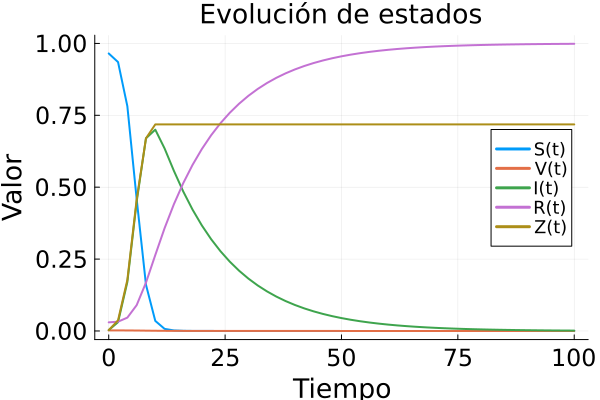

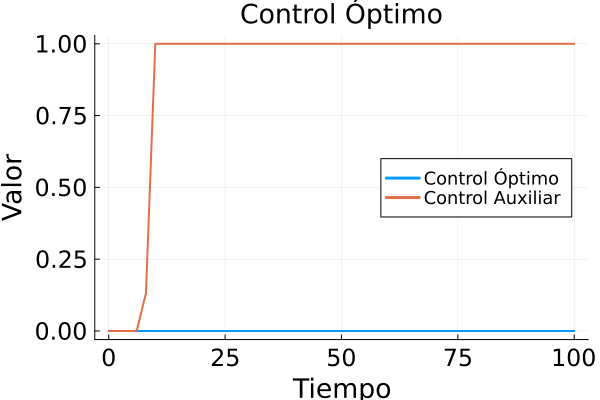

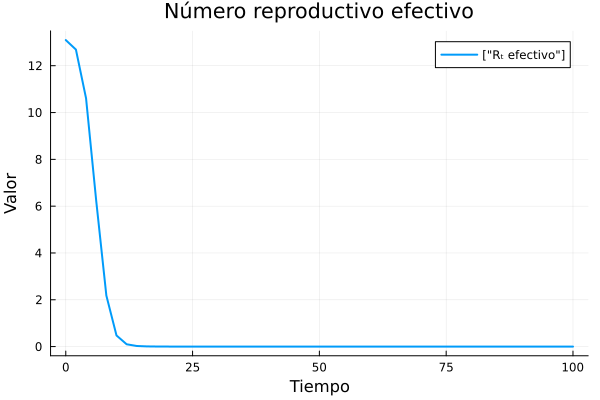

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     2006
Number of nonzeros in inequality constraint Jacobian.:      459
Number of nonzeros in Lagrangian Hessian.............:      510

Total number of variables............................:      408
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      306
Total number of inequality constraints...............:      408
        inequality constraints with only lower bounds:      306
   inequality constraints with lower and upper bounds:      102
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.0000000e-01 8.65e-01 6.67e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

"c:\\Users\\MAX PISARROH\\Desktop\\Ingeniería\\Control\\ProyectoControl\\Control_Integral.png"

In [73]:
# Constants
λᵥ = 10
λₚ = 1
S₀ = 0.965
I₀ = 0.003
R₀ = 0.03
V₀ = 0.002
Z₀ = 0.003
β = 0.95
Φ = 0.7
γ = 0.07
T = 100
ϵ = 1e-4
# Define the optimal control problem
ocp = @def begin
    t ∈ [0, T], time               # Time interval
    x ∈ R⁵, state               # State vector as a function of time
    u ∈ R², control             # Control vector as a function of time

    # Initial conditions for the state variables
    x(0) == [S₀, V₀, I₀, R₀, Z₀]
    
    # State equations (dx/dt)
    ẋ(t) == [
        -β * x(t)[1] * x(t)[3] - u(t)[1] * x(t)[1],               # Ṡ (Susceptible)
        u(t)[1] * x(t)[1] - β * (1 - Φ) * x(t)[2] * x(t)[3],       # V̇ (Vaccine)
        β * x(t)[1] * x(t)[3] + β * (1 - Φ) * x(t)[2] * x(t)[3] - γ * x(t)[3],  # İ (Infected)
        γ * x(t)[3],                                               # Ṙ (Recovered)
        ((1 - u(t)[2]) / 100) * log(exp(100 * (β * x(t)[1] * x(t)[3] + β * (1 - Φ) * x(t)[2] * x(t)[3] - γ * x(t)[3])) + 1 + ϵ)  # Ż (External factor)
    ]
        # Restricciones de los estados (todos los estados deben ser >= 0)
        x(t)[1] ≥ 0  # S (Susceptible)
        x(t)[2] ≥ 0  # V (Vaccine)
        x(t)[3] ≥ 0  # I (Infected)
        x(t)[4] ≥ 0  # R (Recovered)
        x(t)[5] ≥ 0  # Z (External factor)
        # Restricciones de los controles (u₁ ∈ [0, 1] y u₂ ∈ [0, 2])
        0 ≤ u(t)[1] ≤ 0.7  # Control u₁
        0 ≤ u(t)[2] ≤ 1  # Control u₂
        x(t)[5] - x(t)[3] ≥ 0
    # Objective function (minimize cost)
    λₚ * x(T)[5] + ∫(λᵥ * u(t)[1] * x(t)[1])  → min
end

# Solve the optimal control problem
sol = solve(ocp, grid_size = 50)
sol.state(T)
t_vals = 0:0.05:T
valores_estado_ej5 = [sol.state(t) for t in t_vals]
valores_control_ej5 = [sol.control(t) for t in t_vals]
estados = plot(t_vals, hcat(valores_estado_ej5...)', lw=2, 
label=["S(t)" "V(t)" "I(t)" "R(t)" "Z(t)"],
xlabel="Tiempo", ylabel="Valor", title="Evolución de estados", titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12,
legend=:right)
display(estados)
control = plot(t_vals, hcat(valores_control_ej5...)', lw=2, label=["Control Óptimo " "Control Auxiliar " ], xlabel="Tiempo", ylabel="Valor",
title="Control Óptimo",  titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12,legend=:right)
display(control)
valores_r1 = [(β/γ) * sol.state(t)[1] for t in t_vals]
plot_r = plot(t_vals,hcat(valores_r1...)',lw=2,label=["Rₜ efectivo"],xlabel="Tiempo",ylabel="Valor",title= "Número reproductivo efectivo")
display(plot_r)
savefig(estados,"Grafico_Integral.png")
savefig(control,"Control_Integral.png")

## CASO PRIORIZACIÓN A MINIMIZACIÓN DEL PEAK 

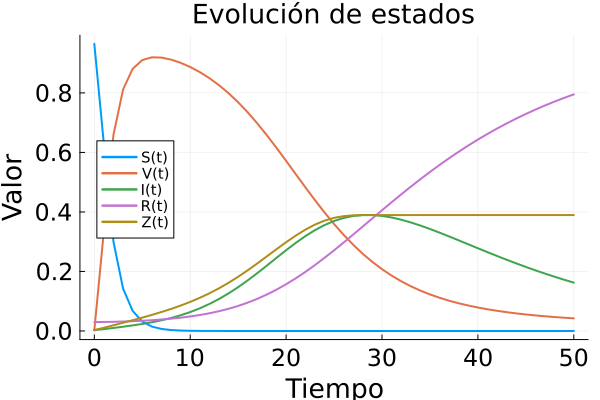

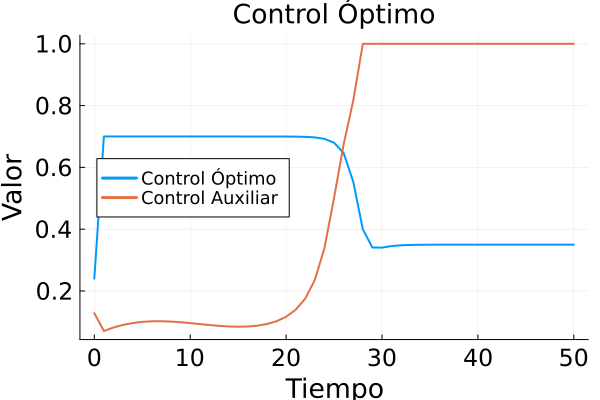

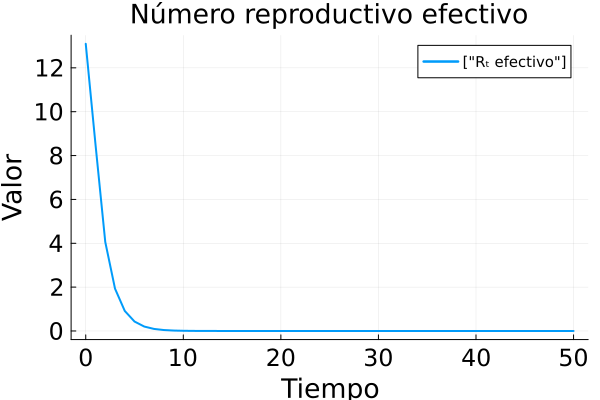

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     2006
Number of nonzeros in inequality constraint Jacobian.:      459
Number of nonzeros in Lagrangian Hessian.............:      510

Total number of variables............................:      408
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      306
Total number of inequality constraints...............:      408
        inequality constraints with only lower bounds:      306
   inequality constraints with lower and upper bounds:      102
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.1000000e+00 8.65e-01 3.97e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

"c:\\Users\\MAX PISARROH\\Desktop\\Ingeniería\\Control\\ProyectoControl\\Rt_OptimalControl.png"

In [88]:
# Constants
λᵥ = 1
λₚ = 10
S₀ = 0.965
I₀ = 0.003
R₀ = 0.03
V₀ = 0.002
Z₀ = 0.003
β = 0.95
Φ = 0.7
γ = 0.07
T = 50
ϵ = 1e-4
# Define the optimal control problem
ocp = @def begin
    t ∈ [0, T], time               # Time interval
    x ∈ R⁵, state               # State vector as a function of time
    u ∈ R², control             # Control vector as a function of time

    # Initial conditions for the state variables
    x(0) == [S₀, V₀, I₀, R₀, Z₀]
    
    # State equations (dx/dt)
    ẋ(t) == [
        -β * x(t)[1] * x(t)[3] - u(t)[1] * x(t)[1],               # Ṡ (Susceptible)
        u(t)[1] * x(t)[1] - β * (1 - Φ) * x(t)[2] * x(t)[3],       # V̇ (Vaccine)
        β * x(t)[1] * x(t)[3] + β * (1 - Φ) * x(t)[2] * x(t)[3] - γ * x(t)[3],  # İ (Infected)
        γ * x(t)[3],                                               # Ṙ (Recovered)
        ((1 - u(t)[2]) / 100) * log(exp(100 * (β * x(t)[1] * x(t)[3] + β * (1 - Φ) * x(t)[2] * x(t)[3] - γ * x(t)[3])) + 1 + ϵ)  # Ż (External factor)
    ]
        # Restricciones de los estados (todos los estados deben ser >= 0)
        x(t)[1] ≥ 0  # S (Susceptible)
        x(t)[2] ≥ 0  # V (Vaccine)
        x(t)[3] ≥ 0  # I (Infected)
        x(t)[4] ≥ 0  # R (Recovered)
        x(t)[5] ≥ 0  # Z (External factor)
        # Restricciones de los controles (u₁ ∈ [0, 1] y u₂ ∈ [0, 2])
        0 ≤ u(t)[1] ≤ 0.7  # Control u₁
        0 ≤ u(t)[2] ≤ 1  # Control u₂
        x(t)[5] - x(t)[3] ≥ 0
    # Objective function (minimize cost)
    λₚ * x(T)[5] + ∫(λᵥ * u(t)[1] * x(t)[1])  → min
end

# Solve the optimal control problem
sol = solve(ocp, grid_size = 50)
sol.state(T)
plot(sol)
t_vals = 0:0.05:T
valores_estado_ej5 = [sol.state(t) for t in t_vals]
valores_control_ej5 = [sol.control(t) for t in t_vals]
estados = plot(t_vals, hcat(valores_estado_ej5...)', lw=2, 
label=["S(t)" "V(t)" "I(t)" "R(t)" "Z(t)"],
xlabel="Tiempo", ylabel="Valor", title="Evolución de estados", titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=10,
legend=:left)
display(estados)
control = plot(t_vals, hcat(valores_control_ej5...)', lw=2, label=["Control Óptimo " "Control Auxiliar " ], xlabel="Tiempo", ylabel="Valor",
title="Control Óptimo",  titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12,legend=:left)
display(control)
valores_r2 = [(β/γ)* sol.state(t)[1] for t in t_vals]
plot_r = plot(t_vals,hcat(valores_r2...)',lw=2,label=["Rₜ efectivo"],xlabel="Tiempo",ylabel="Valor",title= "Número reproductivo efectivo", titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize =10)
display(plot_r)
savefig(plot_r,"Rt_OptimalControl.png")

## CASO PRIORIZACIÓN IGUALITARIA A AMBOS FACTORES

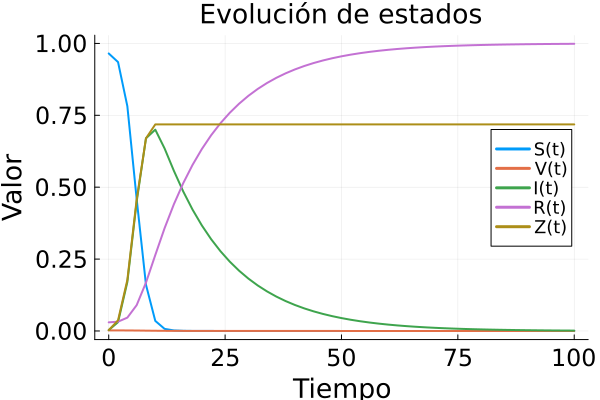

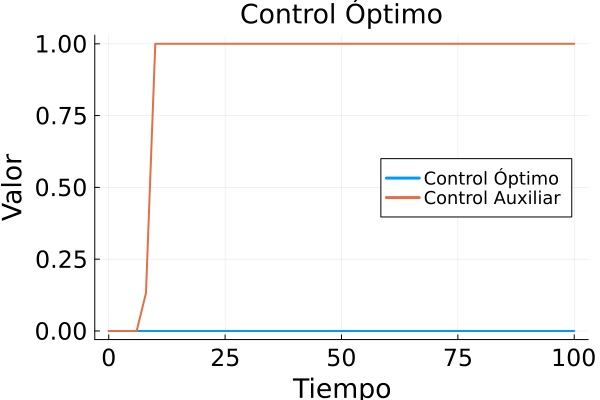

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     2006
Number of nonzeros in inequality constraint Jacobian.:      459
Number of nonzeros in Lagrangian Hessian.............:      510

Total number of variables............................:      408
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      306
Total number of inequality constraints...............:      408
        inequality constraints with only lower bounds:      306
   inequality constraints with lower and upper bounds:      102
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.0000000e-01 8.65e-01 6.67e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

"c:\\Users\\MAX PISARROH\\Desktop\\Ingeniería\\Control\\ProyectoControl\\Control_Igual_Prioridad.png"

In [75]:
# Constants
λᵥ = 1
λₚ = 1
S₀ = 0.965
I₀ = 0.003
R₀ = 0.03
V₀ = 0.002
Z₀ = 0.003
β = 0.95
Φ = 0.7
γ = 0.07
T = 100
ϵ = 1e-4
# Define the optimal control problem
ocp = @def begin
    t ∈ [0, T], time               # Time interval
    x ∈ R⁵, state               # State vector as a function of time
    u ∈ R², control             # Control vector as a function of time

    # Initial conditions for the state variables
    x(0) == [S₀, V₀, I₀, R₀, Z₀]
    
    # State equations (dx/dt)
    ẋ(t) == [
        -β * x(t)[1] * x(t)[3] - u(t)[1] * x(t)[1],               # Ṡ (Susceptible)
        u(t)[1] * x(t)[1] - β * (1 - Φ) * x(t)[2] * x(t)[3],       # V̇ (Vaccine)
        β * x(t)[1] * x(t)[3] + β * (1 - Φ) * x(t)[2] * x(t)[3] - γ * x(t)[3],  # İ (Infected)
        γ * x(t)[3],                                               # Ṙ (Recovered)
        ((1 - u(t)[2]) / 100) * log(exp(100 * (β * x(t)[1] * x(t)[3] + β * (1 - Φ) * x(t)[2] * x(t)[3] - γ * x(t)[3])) + 1 + ϵ)  # Ż (External factor)
    ]
        # Restricciones de los estados (todos los estados deben ser >= 0)
        x(t)[1] ≥ 0  # S (Susceptible)
        x(t)[2] ≥ 0  # V (Vaccine)
        x(t)[3] ≥ 0  # I (Infected)
        x(t)[4] ≥ 0  # R (Recovered)
        x(t)[5] ≥ 0  # Z (External factor)
        # Restricciones de los controles (u₁ ∈ [0, 1] y u₂ ∈ [0, 2])
        0 ≤ u(t)[1] ≤ 0.7  # Control u₁
        0 ≤ u(t)[2] ≤ 1  # Control u₂
        x(t)[5] - x(t)[3] ≥ 0
    # Objective function (minimize cost)
    λₚ * x(T)[5] + ∫(λᵥ * u(t)[1] * x(t)[1])  → min
end

# Solve the optimal control problem
sol = solve(ocp, grid_size = 50)
sol.state(T)
t_vals = 0:0.05:T
valores_estado_ej5 = [sol.state(t) for t in t_vals]
valores_control_ej5 = [sol.control(t) for t in t_vals]
estados = plot(t_vals, hcat(valores_estado_ej5...)', lw=2, 
label=["S(t)" "V(t)" "I(t)" "R(t)" "Z(t)"],
xlabel="Tiempo", ylabel="Valor", title="Evolución de estados", titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12,
legend=:right)
display(estados)
control = plot(t_vals, hcat(valores_control_ej5...)', lw=2, label=["Control Óptimo " "Control Auxiliar " ], xlabel="Tiempo", ylabel="Valor",
title="Control Óptimo",  titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12,legend=:right)
display(control)
valores_r3 = [(β/γ)* sol.state(t)[1] for t in t_vals]
plot_r = plot(t_vals,hcat(valores_r2...)',lw=2,label=["Rₜ efectivo"],xlabel="Tiempo",ylabel="Valor",title= "Número reproductivo efectivo", titlefontsize=18,
guidefontsize=18,
tickfontsize=16,
legendfontsize=12)
savefig(estados,"Grafico_Igual_Prioridad.png")
savefig(control,"Control_Igual_Prioridad.png")